Accuracy: 0.9983

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    151938
           1       1.00      1.00      1.00     25585
           2       1.00      1.00      1.00     31757
           3       0.69      0.66      0.67       435

    accuracy                           1.00    209715
   macro avg       0.92      0.91      0.92    209715
weighted avg       1.00      1.00      1.00    209715



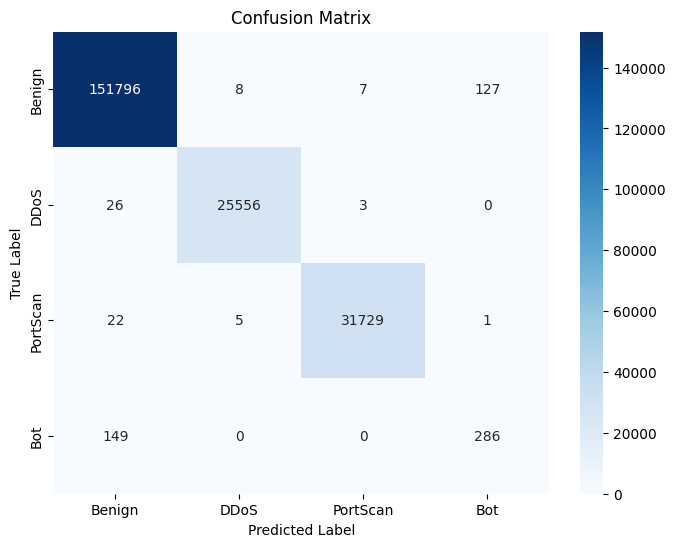

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_curve, average_precision_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv("CICIDS2017_FINAL.csv")
X = df.drop(columns=['Ground_Label', ' Label'])  # Feature columns
y = df['Ground_Label']  # Target variable

# Step 1: Handle missing or infinite values in X
X = X.fillna(X.mean())# Replace NaN with column mean and infinity with 0
X.replace([float('inf'), float('-inf')], 0, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print the classification report for precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['0', '1', '2', '3']))

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'DDoS', 'PortScan','Bot'], yticklabels=['Benign', 'DDoS', 'PortScan','Bot'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

# Assuming you have already split your data into X and y
# X - feature data, y - target labels (Ground_Label)

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation and return the scores (accuracy)
cv_scores = cross_val_score(dt, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores for each fold
print("Cross-validation scores: ", cv_scores)

# Calculate the mean and standard deviation of the accuracy scores
print("Mean accuracy: ", cv_scores.mean())
print("Standard deviation of accuracy: ", cv_scores.std())

Cross-validation scores:  [0.97316358 0.99568939 0.99193191 0.99796867 0.98981475]
Mean accuracy:  0.9897136590134231
Standard deviation of accuracy:  0.008748606309793516
